In [1]:
import numpy as np
import pandas as pd

In [2]:
from env import *

In [3]:
data = pd.read_csv(r'data\data.csv')
data

,date,time,ms,lastprice,volume,bid,bidv,ask,askv,opi,tur,contract,datestr,timestr,midprice
0,20220127,205900,0,4691.0,0.0,4690.0,184,4691.0,14,1728081.0,0.0,rb2205,2022-01-27,20:59:00.000,4690.5
1,20220127,210000,0,4691.0,1458.0,4689.0,23,4691.0,28,1728287.0,68418190.0,rb2205,2022-01-27,21:00:00.000,4690.0
2,20220127,210001,0,4690.0,1185.0,4690.0,646,4692.0,83,1727979.0,55589910.0,rb2205,2022-01-27,21:00:01.000,4691.0
3,20220127,210001,500,4695.0,857.0,4692.0,1,4695.0,1,1727749.0,40204390.0,rb2205,2022-01-27,21:00:01.500,4693.5
4,20220127,210002,0,4692.0,445.0,4692.0,101,4693.0,1,1727614.0,20879450.0,rb2205,2022-01-27,21:00:02.000,4692.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41269,20220128,145958,500,4830.0,123.0,4829.0,254,4830.0,665,1675485.0,5940230.0,rb2205,2022-01-28,14:59:58.500,4829.5
41270,20220128,145959,0,4830.0,438.0,4829.0,252,4830.0,265,1675646.0,21155270.0,rb2205,2022-01-28,14:59:59.000,4829.5
41271,20220128,145959,500,4830.0,179.0,4829.0,186,4830.0,156,1675708.0,8645010.0,rb2205,2022-01-28,14:59:59.500,4829.5
41272,20220128,150000,0,4829.0,97.0,4829.0,132,4830.0,134,1675744.0,4684500.0,rb2205,2022-01-28,15:00:00.000,4829.5


In [4]:
tdata = data[['bid','ask','bidv','askv','volume']]
std = tdata.iloc[0,0]
tdata.loc[:,'bid'] = tdata['bid']-std
tdata.loc[:,'ask'] = tdata['ask']-std

def norm(x):
    return (x-x.mean())/x.std()

tdata.loc[:,'askv'] = norm(tdata.askv)
tdata.loc[:,'bidv'] = norm(tdata.bidv)
tdata.loc[:,'volume'] = norm(tdata.volume)

C:\Users\remote\Anaconda3\envs\pytorch\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


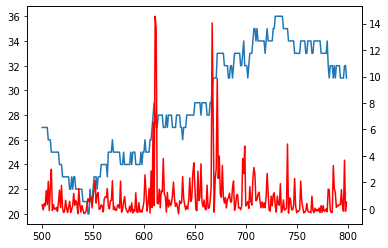

In [5]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tdata.bid[500:800])
ax2.plot(tdata.volume[500:800], color='red')

plt.show()

In [6]:
env = BaseMarket(tdata,back_length=100,time_limit=600)

C:\Users\remote\Anaconda3\envs\pytorch\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [7]:
tot = 0
env.seed(1)
for i in range(1024):
    done = False
    state = env.reset()
    action = 1
    while not done:
        state, reward, done, _ = env.step(action)
        action = 0
        if state[2] == 1:
            action = 2
    tot += reward
print(tot/500)

-0.138


In [8]:
env.seed(1)
tot = 0
for i in range(500):
    done = False
    state = env.reset()
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
    tot += reward
print(tot/500)

-0.052


In [9]:
import elegantrl.agent as agent
from elegantrl.config import Arguments
env_args = {
    'env_num': 1,
    'env_name': 'executioner',
    'max_step': 600,
    'state_dim': (100+1)*5,
    'action_dim': 3,
    'if_discrete': True,
    'target_return': 0.5
}

In [10]:
args = Arguments(agent.AgentD3QN,env=env, env_args=env_args)

In [11]:
from elegantrl.run import train_and_evaluate

In [13]:
args.target_step = args.max_step * 30
args.eval_times = 2 ** 9
args.net_dim = 512
args.batch_size = 512
args.gamma = 0.96
args.explore_rate = 0.1
args.seed = 111
args.learning_rate = 2**-16
train_and_evaluate(args)

| Arguments Remove cwd: ./executioner_D3QN_0
################################################################################
ID     Step    maxR |    avgR   stdR   avgS  stdS |    expR   objC   etc.
0  1.80e+04   -0.04 |
0  1.80e+04   -0.04 |   -0.04    0.7      4     9 |   -0.06   0.21  -0.04
0  9.01e+04   -0.04 |   -0.07    1.7     20    36 |    0.01   0.09   0.09
0  1.62e+05   -0.04 |   -0.12    2.0     27    46 |    0.00   0.08  -0.04
0  2.34e+05   -0.04 |   -0.29    3.3     53   127 |    0.00   0.05   0.14
0  2.88e+05   -0.04 |   -0.06    2.0     29    75 |    0.01   0.06  -0.04
0  3.42e+05   -0.04 |   -0.11    2.4     37    73 |    0.00   0.06   0.08
0  3.96e+05   -0.04 |   -0.13    2.3     39    60 |    0.00   0.04  -0.07


KeyboardInterrupt: 

In [14]:
# age = args.agent().save_or_load_agent(cwd='./executioner_D3QN_0', if_save=False)
from elegantrl.run import *

In [49]:
import torch
torch.set_grad_enabled(False)
# args.init_before_training()
gpu_id = args.learner_gpus

'''init'''
env = build_env(args.env, args.env_func, args.env_args)

age = init_agent(args, gpu_id, env)

In [50]:
age.save_or_load_agent('./executioner_D3QN_0', if_save=False)

In [52]:
env.seed(1)
tot = 0
for i in range(1000):
    done = False
    state = env.reset()
    steps = 0
    while not done:
        steps += 1
        ten_s = torch.as_tensor(state, dtype=torch.float32).unsqueeze(0)
        ten_a = age.act(ten_s).argmax(dim=1)
        state, reward, done, _ = env.step(ten_a[0].numpy())  # different
    tot += reward
    print(steps)
print(tot/1000)

41
359
103
422
4
13
48
85
126
176
469
439
194
330
439
376
51
281
33
448
7
182
12
446
406
45
373
40
417
8
152
141
84
9
13
79
235
39
20
42
29
22
133
5
62
335
296
20
252
185
34
232
595
24
440
7
22
29
184
358
463
446
163
400
32
424
94
5
8
70
39
27
219
21
32
5
7


KeyboardInterrupt: 

In [38]:
tot = 0
env.seed(1)
for i in range(10000):
    done = False
    state = env.reset()
    action = 1
    while not done:
        state, reward, done, _ = env.step(action)
        action = 0
        if state[2] == 1:
            action = 2
    tot += reward
print(tot/10000)

-0.1913


In [39]:
tot = 0
env.seed(1)
for i in range(10000):
    done = False
    state = env.reset()
    action = 2
    while not done:
        state, reward, done, _ = env.step(action)
    tot += reward
print(tot/10000)

-0.0589


In [41]:
tot = 0
env.seed(1)
for i in range(10000):
    done = False
    state = env.reset()
    while not done:
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
    tot += reward
print(tot/10000)

-0.0302


In [28]:
tmp = np.load(r'executioner_D3QN_0\replay_0.npz')

In [40]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('tkagg')
plt.plot(data['bid'])
plt.show()

In [35]:
tmp['buf_other']

array([[ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.99,  2.  ],
       [ 0.  ,  0.99,  2.  ],
       [-0.  ,  0.  ,  2.  ]], dtype=float16)

In [5]:
a = [(1,2,3),(3,4,5),(5,6,5),(7,8,5)]
b = list(map(list, zip(*a)))

In [7]:
import torch
b

[[1, 3, 5, 7], [2, 4, 6, 8], [3, 5, 5, 5]]